En este cuaderno vamos a aprender / practicar / entender que son los "log2 fold-changes" y "Z-scores" que aparecen en los datos del proyecto sobre compuestos quimicos contra Mycobacterium tuberculosis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Archivos de datos: 

In [2]:
file_in = '../data/lfc-p-values_bioactive.csv'
df_lfc = pd.read_csv(file_in)
df_lfc.head(3)

,compound,concentration,strain,n_replicates,log_fold_change,std_error_lfc,log2_fold_change,std_error_l2fc,z_score,p_value
0,BRD-K27893489-003-11-5,1.0,aceE,8,-0.744124,0.096776,-1.073544,0.139618,-7.689167,1.638590e-14
1,BRD-K27893489-003-11-5,3.0,aceE,8,-0.533935,0.096395,-0.770305,0.139068,-5.539061,3.127667e-08
2,BRD-K27893489-003-11-5,9.0,aceE,8,-0.899398,0.097281,-1.297557,0.140347,-9.245345,2.889549e-20


Understand the Z-score: 

In [23]:
df_test = df_lfc[ (df_lfc.strain.values == 'aceE') &  (df_lfc.concentration.values == 30.0)]
df_test.head(10)

,compound,concentration,strain,n_replicates,log_fold_change,std_error_lfc,log2_fold_change,std_error_l2fc,z_score,p_value
3,BRD-K27893489-003-11-5,30.0,aceE,8,-1.560373,0.099562,-2.251143,0.143638,-15.672326,1.254003e-54
7,BRD-K13086613-001-01-6,30.0,aceE,8,-0.560870,0.096703,-0.809165,0.139513,-5.799931,6.860936e-09
9,BRD-K88492762-001-01-5,30.0,aceE,8,-1.243830,0.098705,-1.794467,0.142402,-12.601444,4.214770e-36
13,BRD-K06934249-001-01-8,30.0,aceE,8,-0.105861,0.096033,-0.152726,0.138546,-1.102348,2.703403e-01
17,BRD-A88358860-001-01-1,30.0,aceE,8,0.128800,0.096118,0.185819,0.138669,1.340022,1.802726e-01
21,BRD-K53540417-001-01-1,30.0,aceE,8,-0.514534,0.096417,-0.742315,0.139100,-5.336543,9.706869e-08
28,rifampin,30.0,aceE,8,-3.320163,0.156478,-4.789982,0.225750,-21.218046,1.538401e-98
40,BRD-A97316251-001-01-5,30.0,aceE,8,-0.717199,0.097613,-1.034699,0.140825,-7.347395,2.199531e-13
44,BRD-K25182024-001-01-2,30.0,aceE,8,-0.315618,0.096324,-0.455341,0.138965,-3.276647,1.054502e-03
48,BRD-A92801646-001-01-5,30.0,aceE,8,-1.796076,0.102709,-2.591190,0.148178,-17.486964,2.394564e-67


In [21]:
z_AJ = (df_test.log_fold_change.values - df_test.log_fold_change.mean()) / df_test.log_fold_change.std()

Text(0, 0.5, 'me')

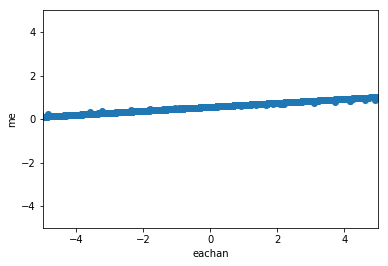

In [22]:
plt.scatter(df_test.z_score.values, z_AJ)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('eachan')
plt.ylabel('me')


What if you use the entire dataset: 

In [10]:
z_AJ = (df_lfc.log_fold_change.values - df_lfc.log_fold_change.mean()) / df_lfc.log_fold_change.std()

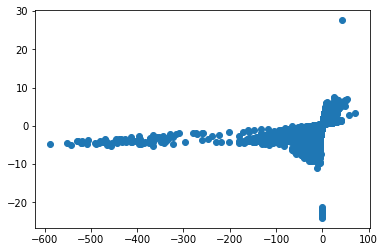

In [11]:
plt.scatter(df_lfc.z_score.values, z_AJ)